In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from MultiArmedBandit import Arm, bernoulliArm, evolvingBernoulliArm
from Exp3 import exp3, exp3P, exp3_IX
from OtherBanditAlgorithms import UCB1, Random

Populating the interactive namespace from numpy and matplotlib


In [2]:
def gaussian_traj(T):
    """gaussian trajectories normalized to lie in [0, 1]"""
    gp = np.cumsum(np.random.normal(0, 10, T))

    # normalization (to have rewards in [0, 1]) :
    gp += np.abs(min(gp))
    gp /= max(gp)
    return(gp)

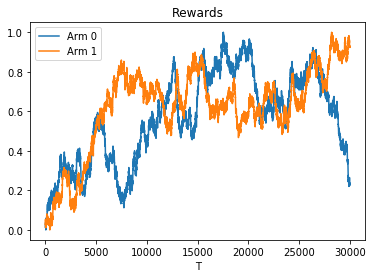

In [3]:
np.random.seed(1)

T = 30000

K = 2
MAB = [Arm(gaussian_traj(T)) for _ in range(K)]

for arm in MAB:
    plt.plot(arm.rewards)
plt.xlabel("T")
plt.legend(['Arm {}'.format(str(k)) for k in range(K)])
plt.title('Rewards')

savefig('MarkovRewards', dpi=500)

### Comparison of different algorithms on gaussian arms

In [4]:
#set up the parameters
delta = 0.05
eta = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

eta = np.sqrt(2*np.log(K)/(K*T))
gamma = 0.5*eta

In [6]:
rew, _, _ = exp3(MAB, T, eta=eta, gamma=np.sqrt(K * log(K) / ((np.exp(1) - 1) * T)))
rew_P, _, _ = exp3P(MAB, T, beta=beta, gamma=gamma, eta=eta)
rew_IX, _, _ = exp3_IX(MAB, T, eta=eta, gamma=0.5)
rew_UCB = UCB1(MAB, T, rho=0.2)
rew_random = Random(MAB, T)

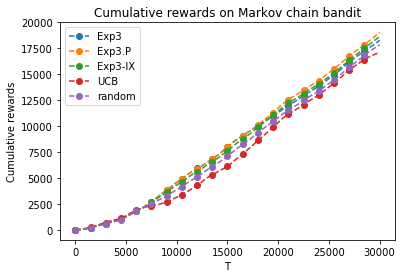

In [8]:
# Cumulative rewards for each arm
arms_cumsum = [np.cumsum(arm.rewards) for arm in MAB]

# Cumulative rewards for each algorithm
exp3_cumsum = np.cumsum(rew)
exp3_P_cumsum = np.cumsum(rew_P)
exp3_IX_cumsum = np.cumsum(rew_IX)
UCB_cumsum = np.cumsum(rew_UCB)
random_cumsum = np.cumsum(rew_random)

#for k in range(K):
#    plt.plot(arms_cumsum[k], alpha=0.5, label="Arm {}".format(str(k)))

plt.plot(exp3_cumsum, '--o', markevery=1500, label="Exp3")
plt.plot(exp3_P_cumsum, '--o', markevery=1500, label="Exp3.P")
plt.plot(exp3_IX_cumsum, '--o', markevery=1500, label="Exp3-IX")

plt.plot(UCB_cumsum, '--o', markevery=1500, label="UCB")
plt.plot(random_cumsum, '--o', markevery=1500, label="random")

plt.legend(loc="upper left")
plt.title("Cumulative rewards on Markov chain bandit")
plt.xlabel('T')
plt.ylabel('Cumulative rewards')

# Mean average reward

In [22]:
n_iter = 20
T = 30000
K = 6

MAB = [Arm(gaussian_traj(T)) for _ in range(K)]

exp3_cumsum = np.zeros((n_iter, T))
exp3_P_cumsum = np.zeros((n_iter, T))
exp3_IX_cumsum = np.zeros((n_iter, T))
UCB_cumsum = np.zeros((n_iter, T))
random_cumsum = np.zeros((n_iter, T))

for n in range(n_iter):
    MAB = [Arm(gaussian_traj(T)) for _ in range(K)]
    rew, _, _ = exp3(MAB, T, eta=eta, gamma=np.sqrt(K * log(K) / ((np.exp(1) - 1) * T)))
    rew_P, _, _ = exp3P(MAB, T, beta=beta, gamma=gamma, eta=eta)
    rew_IX, _, _ = exp3_IX(MAB, T, eta=eta, gamma=0.5)
    rew_UCB = UCB1(MAB, T, rho=0.2)
    rew_random = Random(MAB, T)

    exp3_cumsum[n, :] = np.cumsum(rew)
    exp3_P_cumsum[n, :] = np.cumsum(rew_P)
    exp3_IX_cumsum[n, :] = np.cumsum(rew_IX)
    UCB_cumsum[n, :] = np.cumsum(rew_UCB)
    random_cumsum[n, :] = np.cumsum(rew_random)
    
exp3_cumsum_average = np.mean(exp3_cumsum, 0)
exp3_P_cumsum_average = np.mean(exp3_P_cumsum, 0)
exp3_IX_cumsum_average = np.mean(exp3_IX_cumsum, 0)
UCB_cumsum_average = np.mean(UCB_cumsum, 0)
random_cumsum_average = np.mean(random_cumsum, 0)

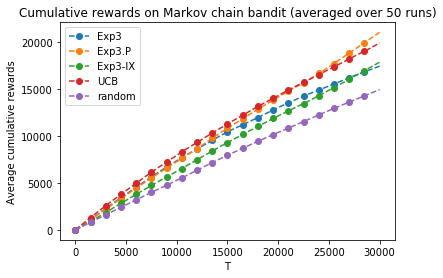

In [23]:
plt.plot(exp3_cumsum_average, '--o', markevery=1500, label="Exp3")
plt.plot(exp3_P_cumsum_average, '--o', markevery=1500, label="Exp3.P")
plt.plot(exp3_IX_cumsum_average, '--o', markevery=1500, label="Exp3-IX")

plt.plot(UCB_cumsum_average, '--o', markevery=1500, label="UCB")
plt.plot(random_cumsum_average, '--o', markevery=1500, label="random")

plt.legend(loc="upper left")
plt.title("Cumulative rewards on Markov chain bandit (averaged over 50 runs)")
plt.xlabel('T')
plt.ylabel('Average cumulative rewards')
savefig('MarkovBandit_K_6', dpi=500)

## Weak regret bound of Exp3 if the number of rounds is known

In [16]:
# Compute best arm at round t
arm1_cumsum = np.cumsum(arm1.rewards)
arm2_cumsum = np.cumsum(arm2.rewards)

best_action_rew = np.zeros(T)

for t in range(T):
    best_action_rew[t] = max(arm1_cumsum[t], arm2_cumsum[t], arm3_cumsum[t])

NameError: name 'arm1' is not defined

/Users/Schreuder/Google Drive/Cours/MVA/S1/Reinforcement_Learning/adversarial_MAB_project/Exp3.py:49: RuntimeWarning: overflow encountered in exp
  weights_hist.append(np.exp(eta[t] * R))


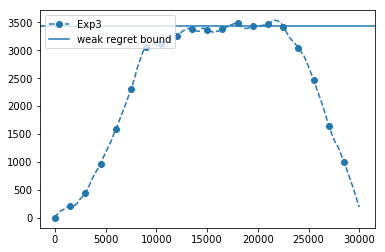

In [65]:
eta = np.sqrt(2 * np.log(K) / T * K)

rew_exp3 = np.zeros(T)
n_iter = 20

for i in range(n_iter):
    rew, _ = exp3(MAB, T, eta)
    rew_exp3 += rew
    
rew_exp3 /= n_iter
    
exp3_cumsum = np.cumsum(rew_exp3)
plt.plot(exp3_cumsum - best_action_rew, '--o', markevery=1500, label="Exp3")

plt.axhline(np.sqrt( 2 * T * K * np.log(K)), label="weak regret bound")
plt.legend(loc="upper left")

## Weak regret of Exp3 when the number of rounds is uknown

In [8]:
K = len(MAB)
etas = [np.sqrt(2 * np.log(K) / (t + 1) * K) for t in range(T)]

rew_exp3 = np.zeros(T)
n_iter = 1000

for i in range(n_iter):
    rew_exp3 += exp3(MAB, T, etas)
rew_exp3 /= n_iter

    
exp3_cumsum = np.cumsum(rew_exp3)
plt.plot(exp3_cumsum - best_action_rew, '--o', markevery=1500, label="Exp3")

plt.plot([np.sqrt(4 * t * K * np.log(K)) for t in range(T)], label="weak regret bound")
plt.legend(loc="upper left")

ValueError: setting an array element with a sequence.

## Regret of Exp3.P

In [ ]:
K = len(MAB)
delta = 0.05
eta = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

#calculate best arm at each round
best_action_rew = np.zeros(T)
for t in range(T):
    best_action_rew[t] = max(arm1_cumsum[t], arm2_cumsum[t], arm3_cumsum[t])

#first type of regret bound
rew_exp3P = exp3P(MAB, T, eta, gamma, beta)

exp3P_cumsum = np.cumsum(rew_exp3P)

plt.plot(exp3P_cumsum - best_action_rew, label="Exp3P 1") 
plt.axhline(5.15 * np.sqrt(T * K * np.log(K / delta)), c="black", label="Regret 1 bound")

#second type of regret bound
beta = np.sqrt(np.log(K) /  (T * K))

rew_exp3P = exp3P(MAB, T, eta, gamma, beta)
exp3P_cumsum = np.cumsum(rew_exp3P)
plt.plot(exp3P_cumsum - best_action_rew, label="Exp3P 2") 
plt.axhline(5.15 * np.sqrt(T * K * np.log(K)) + np.sqrt(T * K / np.log(K)) * np.log(1 / delta), c="red", label="Regret 2 bound")

plt.legend(loc="upper left")
plt.title("Regret of Exp3.P and its bounds")

## Weak regret of Exp3.P

In [ ]:
#hyperparameters
eta = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K) /  (T * K))

#calculate best arm at each round
best_action_rew = np.zeros(T)
for t in range(T):
    best_action_rew[t] = max(arm1_cumsum[t], arm2_cumsum[t], arm3_cumsum[t])

rew_exp3P = np.zeros(T)
n_iter = 100
for i in range(n_iter):
    rew_exp3P += exp3P(MAB, T, eta, gamma, beta)
rew_exp3P /= n_iter

exp3P_cumsum = np.cumsum(rew_exp3P)

plt.plot(exp3P_cumsum - best_action_rew, label="Exp3P 2") 
plt.axhline(5.15 * np.sqrt(T * K * np.log(K)) + np.sqrt(T * K / np.log(K)), c="red", label="Weak regret bound")

plt.legend(loc="upper left")